In [98]:
import os
import cv2
from random import shuffle
from tqdm import tqdm
import numpy as np

In [40]:
cv2_base_dir = os.path.dirname(os.path.abspath(cv2.__file__))
haar_model = os.path.join(cv2_base_dir, 'data/haarcascade_frontalface_default.xml')
face_classifier = cv2.CascadeClassifier(haar_model)
cap = cv2.VideoCapture(0)
id = 1
name = "Bharat"
img_id = 0
while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Unable to capture frame from webcam.")
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cropped_face = gray[y:y+h, x:x+w]
        cv2.rectangle(gray, (x, y), (x + w, y + h), (0, 255, 0), 2)
    img_id += 1
    face = cv2.resize(cropped_face, (150, 150))
    file_name_path = f"DataSet/{name}" + "." + str(id) + "."+ str(img_id) + ".jpg"
    cv2.imwrite(file_name_path, face)
    cv2.putText(face, str(img_id), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("Cropped Face", face)
    if cv2.waitKey(1) == ord('q') or int(img_id) == 1000:
        break
cap.release()
cv2.destroyAllWindows()
print("Done")

Done


In [159]:
def my_label(image_name):
    name = image_name.split('.')[0]
    if name == "Bharat":
        return np.array([1,0,0])
    elif name == "Shyam":
        return np.array([0,1,0])
    elif name == "Khedup":
        return np.array([0,0,1])
        

In [158]:
for img in tqdm(os.listdir("DataSet")): 
    name = img.split('.')[0]
print(name)

100%|██████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<?, ?it/s]

Bharat


In [160]:
def my_data():
    data= []
    for img in tqdm(os.listdir("DataSet")):
        path = os.path.join("DataSet", img)
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (50, 50))

        # name = img.split('.')[-3]
        # if name == "Bharat":
        #     data.append([np.array(img_data), np.array([1,0,0])])
        #     # arr = 
        # elif name == "Shyam":
        #     data.append([np.array(img_data), np.array([0,1,0])])
        #     # arr = np.array([0,1,0])
        # elif name == "Khedup":
        #     data.append([np.array(img_data), np.array([0,0,1])])
        #     # arr = np.array([0,0,1])
        
        data.append([np.array(img_data), my_label(img)])
    shuffle(data)
    return data

In [161]:
data = my_data()
train = data[:600]
test = data[600:]
X_train = np.array([i[0] for i in train]).reshape(-1,50,50,1)
y_train = np.array([i[1] for i in train])
X_test = np.array([i[0] for i in test]).reshape(-1,50,50,1)
y_test = np.array([i[1] for i in test])
print(len(y_train))

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1762.37it/s]

600


In [162]:
for i in train: print(i[1])

[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]
[1 0 0]


In [142]:
# import warnings
# warnings.filterwarnings("ignore")
from PIL import Image as pil
from pkg_resources import parse_version

if parse_version(pil.__version__)>=parse_version('10.0.0'):
    pil.ANTIALIAS=pil.LANCZOS

import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

In [163]:
# tf.reset_default_graph()
tf.compat.v1.reset_default_graph()
convnet = input_data(shape=[50, 50, 1])
convnet = conv_2d(convnet, 32, 5, activation= 'relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)
convnet = fully_connected(convnet, 3, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate = 0.001, loss='categorical_crossentropy')
model = tflearn.DNN(convnet, tensorboard_verbose=1)
model.fit(X_train, y_train, n_epoch=12, validation_set=(X_test, y_test), show_metric = True, run_id="FRS" )

Training Step: 119  | total loss: 0.00000 | time: 0.767s
| Adam | epoch: 012 | loss: 0.00000 - acc: 1.0000 -- iter: 576/600
Training Step: 120  | total loss: 0.00000 | time: 1.837s
| Adam | epoch: 012 | loss: 0.00000 - acc: 1.0000 | val_loss: 0.00000 - val_acc: 1.0000 -- iter: 600/600
--


In [168]:
def data_for_visualization():
    Vdata = []
    for img in tqdm(os.listdir("visualization")):
        path = os.path.join("visualization", img)
        img_num = img.split('.')[0] 
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (50,50))
        Vdata.append([np.array(img_data), img_num])
    shuffle(Vdata)
    return Vdata

100%|████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 1264.30it/s]


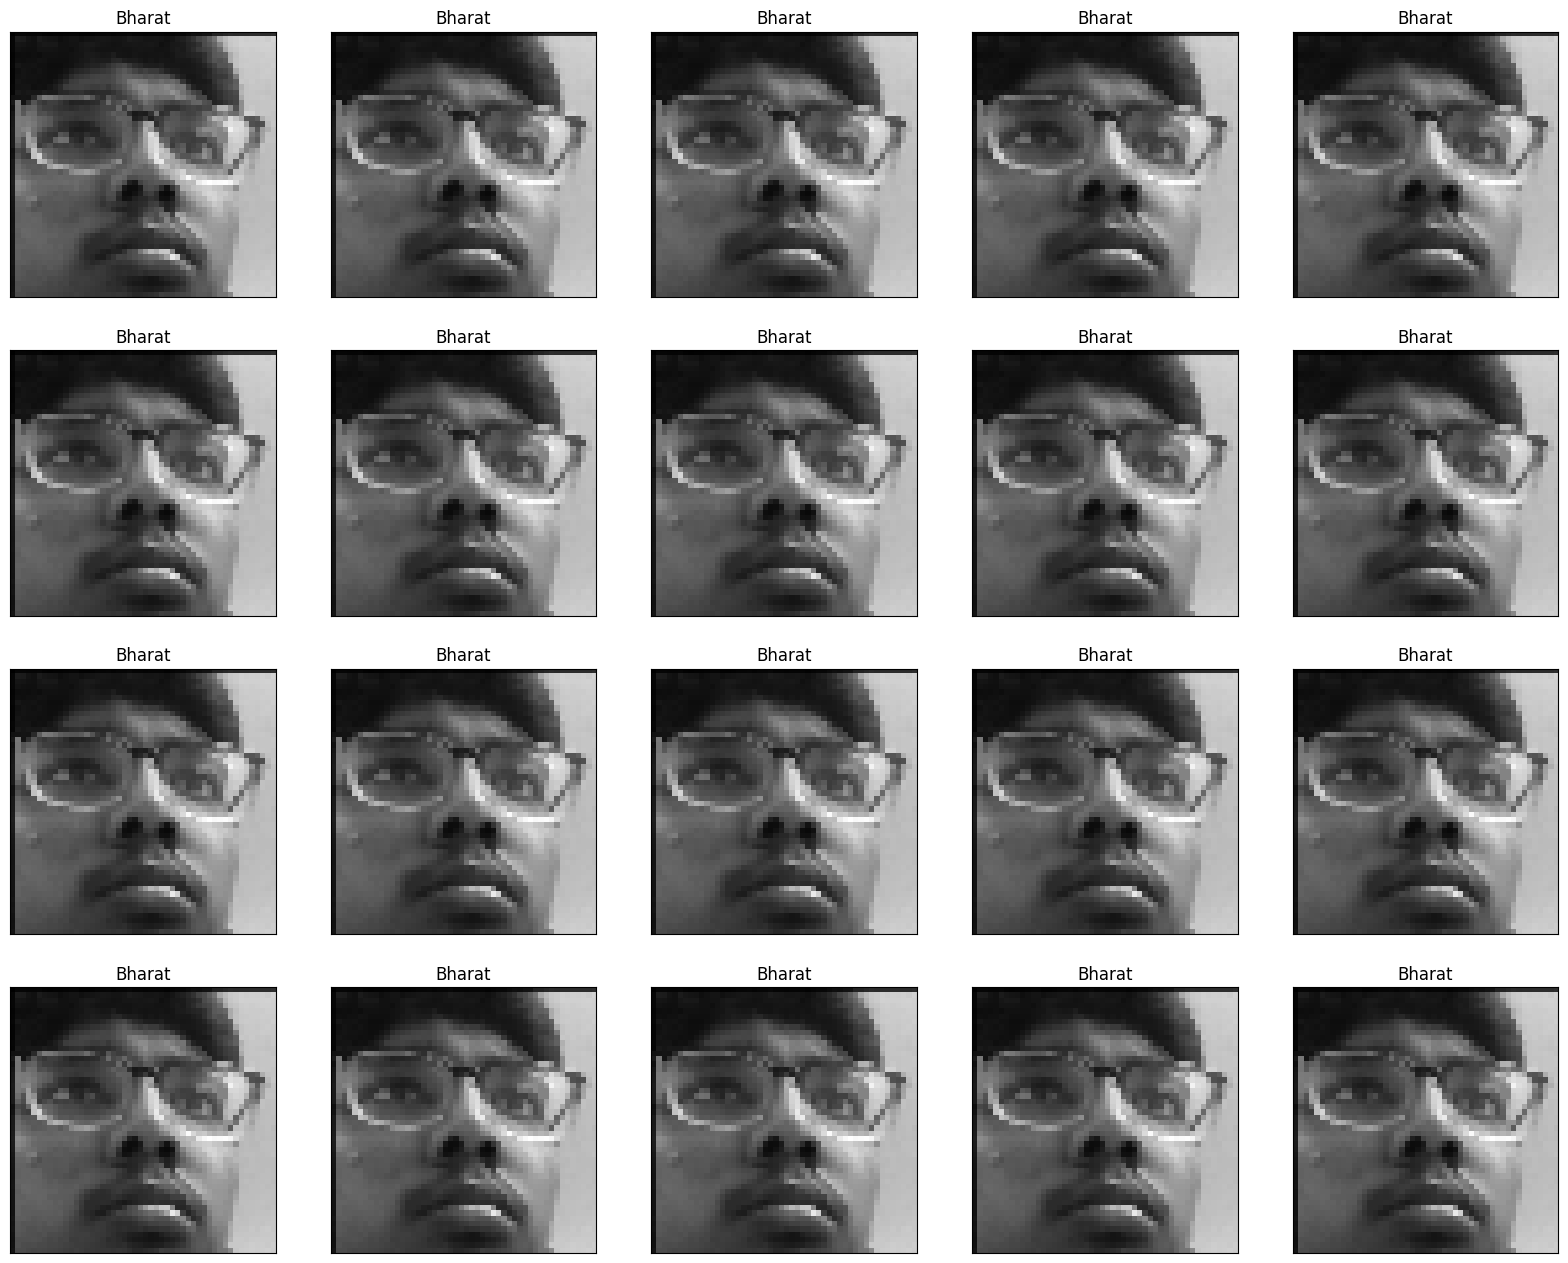

In [170]:
import matplotlib.pyplot as plt   # installation command: pip install matplotlib
Vdata = data_for_visualization()
fig = plt.figure(figsize=(20,20))
for num, data in enumerate(Vdata[:20]):
    img_data = data[0]
    y = fig.add_subplot(5,5, num+1)
    image = img_data
    data = img_data.reshape(50,50,1)
    model_out = model.predict([data])[0]
     
    if np.argmax(model_out) == 0:
        my_label = 'Bharat'
    elif np.argmax(model_out) == 1:
        my_label = 'Shyam'
    else:
        my_label = 'Khedup'
         
    y.imshow(image, cmap='gray')
    plt.title(my_label)
     
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [ ]:
while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Unable to capture frame from webcam.")
        break
    data = frame.reshape(

    cv2.imshow('Face Detection', frame)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()